In [145]:
import pandas as pd
import numpy as np

# Data Munging Script
This script concatenates the responses for identically worded questions into a single column. Where multiple responses are allowed, responses will be separated by a comma. See below for example outputs.

?: "I believe most biodiversity programs" and "I believe most USAID biodiversity programs"... same question or different?

In [250]:
dff = pd.read_excel(r'C:/Users/Erik/Downloads/mi2-data.xlsx', 'RAW_INPUT', header=[0,1], engine='openpyxl', date_parser=[3,4])

# THIS CAN ALL BE DONE WITH ONLY THE LEVEL 1
# (1) strip columns of returns
# (2) update instances of 'previous response' to point to previous column
columns = []
for idx, column in enumerate(dff.columns):
    level1 = column[0].strip()
    level2 = column[1].strip()
    if 'previous response' in level1.lower():
        previous_question = dff.columns[idx-1][0]
        new_level1 = level1 + '(' + previous_question + ')'
        columns.append((new_level1, level2))
    else:
        columns.append((level1, level2))
dff.columns = pd.MultiIndex.from_tuples(columns, names=["first", "second"])

# concatenate identical questions and drop response row
series = []
already_seen = set()
for i in column_index_first_seen:
    if type(i)==int:
        s = dff.iloc[:,i].copy()
        s.name = s.name[0]
        series.append(s)
    elif type(i)==np.ndarray:
        s = dff.iloc[:,i].copy()
        name = s.columns[0][0]
        if name not in already_seen:
            s = s.droplevel('second', axis=1)
            s = s.apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
            s.name = name
            series.append(s)
            already_seen.add(name)
clean_df = pd.concat(series, axis=1)

# convert all empty cells to nan
clean_df = clean_df.replace(r'^\s*$', np.nan, regex=True)

# save to csv
clean_df.to_csv('clean_df.csv')


## Data Munging Walk-through

In [203]:
dff = pd.read_excel(r'C:/Users/Erik/Downloads/mi2-data.xlsx', 'RAW_INPUT', header=[0,1], engine='openpyxl', date_parser=[3,4])
for column in dff.columns:
    print(column)

('Respondent ID', 'Unnamed: 0_level_1')
('Collector ID', 'Unnamed: 1_level_1')
('Start Date', 'Unnamed: 2_level_1')
('End Date', 'Unnamed: 3_level_1')
('IP Address', 'Unnamed: 4_level_1')
('Email Address', 'Unnamed: 5_level_1')
('First Name', 'Unnamed: 6_level_1')
('Last Name', 'Unnamed: 7_level_1')
('Custom Data 1', 'Unnamed: 8_level_1')
('Are you willing to participate in the survey?\n \n ', 'Response')
('We will ask you to create a unique identifier so the survey analysis team can identify repeated responses across years. Please respond with the first letter of your birth city, the third letter of your birth month, and the last two digits of your phone number. Example: someone born in Seattle, in March, phone (202) 123-4567 would answer SR67', 'Open-Ended Response')
('Please indicate your gender (optional)\n ', 'Open-Ended Response')
('Did you support a USAID biodiversity program in the past year?', 'Yes')
('Did you support a USAID biodiversity program in the past year?', 'No')
('Di

In [204]:
dff[('Did you support a USAID biodiversity program in the past year?', 'Yes')].count()

71

<AxesSubplot:ylabel='(I believe the use of adaptive management improves biodiversity program outcomes.\n \n \n , Response)'>

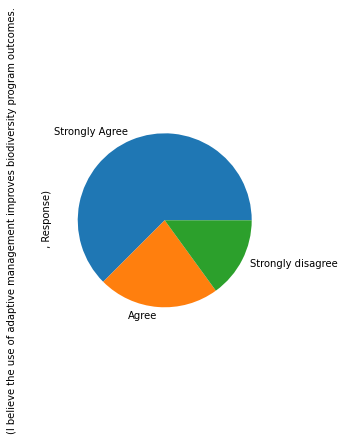

In [205]:
dff[('I believe the use of adaptive management improves biodiversity program outcomes.\n \n \n ', 'Response')].value_counts().plot(kind='pie')

In [206]:
dff[('We will ask you to create a unique identifier so the survey analysis team can identify repeated responses across years. Please respond with the first letter of your birth city, the third letter of your birth month, and the last two digits of your phone number. Example: someone born in Seattle, in March, phone (202) 123-4567 would answer SR67', 'Open-Ended Response')].nunique()==dff[('We will ask you to create a unique identifier so the survey analysis team can identify repeated responses across years. Please respond with the first letter of your birth city, the third letter of your birth month, and the last two digits of your phone number. Example: someone born in Seattle, in March, phone (202) 123-4567 would answer SR67', 'Open-Ended Response')].count()

False

In [207]:
# THIS CAN ALL BE DONE WITH ONLY THE LEVEL 1
# strip columns of returns
columns = []
for column in dff.columns:
    level1 = column[0].strip()
    level2 = column[1].strip()
    columns.append((level1, level2))
dff.columns = pd.MultiIndex.from_tuples(columns, names=["first", "second"])
dff.columns[17]

('What stage(s) in the Program Cycle were you supporting? (select all that apply)',
 'Strategy (CDCS)')

In [208]:
# update instances of 'previous response' to point to previous column
new_columns = []
for idx, column in enumerate(dff.columns):
    level1 = column[0]
    level2 = column[1]
    if 'previous response' in level1.lower():
        previous_question = dff.columns[idx-1][0]
        new_level1 = level1 + '(' + previous_question + ')'
        new_columns.append((new_level1, level2))
    else:
        new_columns.append((level1, level2))


Please provide some context to your previous response.(I am confident in my ability to apply adaptive management to my work.)
Please provide some context to your previous response.(I believe I can overcome barriers to implementing adaptive management.)
Please provide some context to your previous response.(I am confident in my ability to apply adaptive management to my work.)
Please provide some context to your previous response.(I believe I can overcome barriers to implementing adaptive management.)
Please provide some context to your previous response.(I am confident in my ability to support the use of adaptive management through my work.)
Please provide some context to your previous response.(I believe I can overcome barriers affecting my support to biodiversity teams implementing adaptive management.)
Please provide some context to your previous response.(I am confident in my ability to support the use of adaptive management through my work.)
Please provide some context to your pre

In [209]:
dff.columns = pd.MultiIndex.from_tuples(new_columns, names=["first", "second"])
dff.columns[50]

('Please provide some context to your previous response.(I am confident in my ability to support the use of adaptive management through my work.)',
 'Open-Ended Response.4')

In [210]:
# merge columns where level one (question header) is the same
level_ones = dff.columns.get_level_values('first')
column_index_first_seen = [level_ones.get_loc(c) for c in level_ones]
column_index_first_seen

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False]),
 array([False, False, False, False, False, False, False, Fal

In [211]:
example_question = dff.iloc[:,column_index_first_seen[17]]
example_question

first  What stage(s) in the Program Cycle were you supporting? (select all that apply)  \
second                                                                 Strategy (CDCS)   
0                                                     NaN                                
1                                         Strategy (CDCS)                                
2                                                     NaN                                
3                                         Strategy (CDCS)                                
4                                         Strategy (CDCS)                                
..                                                    ...                                
89                                                    NaN                                
90                                                    NaN                                
91                                                    NaN                                
92                                                    NaN                                
93                                        Strategy (CDCS)                                

first                                                             \
second  Project design (PAD)  Activity design and/or procurement   
0                        NaN  Activity design and/or procurement   
1       Project design (PAD)  Activity design and/or procurement   
2                        NaN  Activity design and/or procurement   
3       Project design (PAD)  Activity design and/or procurement   
4       Project design (PAD)  Activity design and/or procurement   
..                       ...                                 ...   
89      Project design (PAD)  Activity design and/or procurement   
90                       NaN                                 NaN   
91                       NaN  Activity design and/or procurement   
92      Project design (PAD)  Activity design and/or procurement   
93      Project design (PAD)  Activity design and/or procurement   

first                                                           \
second  Activity start up  Activity implementation  Evaluation   
0                     NaN  Activity implementation         NaN   
1       Activity start up  Activity implementation  Evaluation   
2                     NaN                      NaN         NaN   
3       Activity start up  Activity implementation  Evaluation   
4                     NaN                      NaN  Evaluation   
..                    ...                      ...         ...   
89      Activity start up  Activity implementation  Evaluation   
90                    NaN                      NaN         NaN   
91      Activity start up  Activity implementation         NaN   
92                    NaN  Activity implementation         NaN   
93      Activity start up  Activity implementation  Evaluation   

first                          
second Other (please specify)  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
..                        ...  
89                        NaN  
90                        NaN  
91                        NaN  
92                        NaN  
93                        NaN  

[94 rows x 7 columns]

In [212]:
example_question.droplevel('second', axis=1)

first,What stage(s) in the Program Cycle were you supporting? (select all that apply),What stage(s) in the Program Cycle were you supporting? (select all that apply),What stage(s) in the Program Cycle were you supporting? (select all that apply),What stage(s) in the Program Cycle were you supporting? (select all that apply),What stage(s) in the Program Cycle were you supporting? (select all that apply),What stage(s) in the Program Cycle were you supporting? (select all that apply),What stage(s) in the Program Cycle were you supporting? (select all that apply)
0,NaN,NaN,Activity design and/or procurement,NaN,Activity implementation,NaN,NaN
1,Strategy (CDCS),Project design (PAD),Activity design and/or procurement,Activity start up,Activity implementation,Evaluation,NaN
2,NaN,NaN,Activity design and/or procurement,NaN,NaN,NaN,NaN
3,Strategy (CDCS),Project design (PAD),Activity design and/or procurement,Activity start up,Activity implementation,Evaluation,NaN
4,Strategy (CDCS),Project design (PAD),Activity design and/or procurement,NaN,NaN,Evaluation,NaN
...,...,...,...,...,...,...,...
89,NaN,Project design (PAD),Activity design and/or procurement,Activity start up,Activity implementation,Evaluation,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,Activity design and/or procurement,Activity start up,Activity implementation,NaN,NaN
92,NaN,Project design (PAD),Activity design and/or procurement,NaN,Activity implementation,NaN,NaN


In [213]:
example_question.columns[0][0]

'What stage(s) in the Program Cycle were you supporting? (select all that apply)'

In [214]:
example_question.apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)


0     Activity design and/or procurement, Activity i...
1     Strategy (CDCS), Project design (PAD), Activit...
2                    Activity design and/or procurement
3     Strategy (CDCS), Project design (PAD), Activit...
4     Strategy (CDCS), Project design (PAD), Activit...
                            ...                        
89    Project design (PAD), Activity design and/or p...
90                                                     
91    Activity design and/or procurement, Activity s...
92    Project design (PAD), Activity design and/or p...
93    Strategy (CDCS), Project design (PAD), Activit...
Length: 94, dtype: object

In [215]:
series = []
already_seen = set()
for i in column_index_first_seen:
    if type(i)==int:
        s = dff.iloc[:,i].copy()
        s.name = s.name[0]
        series.append(s)
    elif type(i)==np.ndarray:
        s = dff.iloc[:,i].copy()
        name = s.columns[0][0]
        if name not in already_seen:
            s = s.droplevel('second', axis=1)
            s = s.apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
            s.name = name
            series.append(s)
            already_seen.add(name)

In [216]:
clean_df = pd.concat(series, axis=1)
for c in clean_df.columns:
    print(c + '\n')

Respondent ID

Collector ID

Start Date

End Date

IP Address

Email Address

First Name

Last Name

Custom Data 1

Are you willing to participate in the survey?

We will ask you to create a unique identifier so the survey analysis team can identify repeated responses across years. Please respond with the first letter of your birth city, the third letter of your birth month, and the last two digits of your phone number. Example: someone born in Seattle, in March, phone (202) 123-4567 would answer SR67

Please indicate your gender (optional)

Did you support a USAID biodiversity program in the past year?

What stage(s) in the Program Cycle were you supporting? (select all that apply)

What best describes your role in the USAID biodiversity program you supported most recently? (choose one)

Please indicate the USAID operating unit you were associated with when serving in this role.

I believe the use of adaptive management improves biodiversity program outcomes.

I believe adaptive manag

# Indicator Calculation

In [278]:
# create dictionary of questions to codes
# NOTE THIS MIGHT RESULT IN DUPLICATE COLUMN NAMES
d = {}
for code, question in zip(df.iloc[0], dff.columns.get_level_values(0)):
    d[question] = code
d

{'Respondent ID': 'RESP_ID',
 'Collector ID': 'Collector ID',
 'Start Date': 'Start Date',
 'End Date': 'End Date',
 'IP Address': 'IP Address',
 'Email Address': 'Email Address',
 'First Name': 'First Name',
 'Last Name': 'Last Name',
 'Custom Data 1': 'Custom Data 1',
 'Are you willing to participate in the survey?': 'BD1-4',
 'We will ask you to create a unique identifier so the survey analysis team can identify repeated responses across years. Please respond with the first letter of your birth city, the third letter of your birth month, and the last two digits of your phone number. Example: someone born in Seattle, in March, phone (202) 123-4567 would answer SR67': 'ID1-1',
 'Please indicate your gender (optional)': 'GN1-1',
 'Did you support a USAID biodiversity program in the past year?': 'BD4-2',
 'What stage(s) in the Program Cycle were you supporting? (select all that apply)': 'BD3-1',
 'What best describes your role in the USAID biodiversity program you supported most recentl

## Indicator 1.1a
Shared understanding of the value of AM for biodiversity programming					
This sub-indicator is calculated as the percentage of respondents that agrees or strongly agrees that AM improves biodiversity outcomes converted to a 5-point scale.					

In [245]:
df = pd.read_excel(r'C:/Users/Erik/Downloads/mi2-data.xlsx', 'RAW_CODED', header=None, engine='openpyxl', date_parser=[3,4])
df.iloc[0]

0           RESP_ID
1      Collector ID
2        Start Date
3          End Date
4        IP Address
           ...     
107           PR6-5
108           PR3-4
109           PR7-4
110           PR4-3
111           PR8-5
Name: 0, Length: 112, dtype: object

In [251]:
coded_df = clean_df.rename(columns=d)
coded_df.columns

Index(['RESP_ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'BD1-4',
       'ID1-1', 'GN1-1', 'BD4-2', 'BD3-1', 'BD4-2', 'MISS_NAME', 'AM6-3',
       'AM9-1', 'AM7-1', 'OPEN1', 'AM8-2', 'OPEN2', 'AM13-1', 'OEPN1',
       'AM14-4', 'OPEN2', 'AM1-2', 'AM4-2', 'AM2-2', 'EV3-4', 'EV2-4', 'PR1-5',
       'PR5-5', 'PR2-4', 'PR6-5', 'PR3-4', 'PR7-4', 'PR4-3', 'PR8-5', 'MI1-4',
       'MI2-4', 'MI3-4OTH', 'MI4-5', 'MI6.1-3', 'MI6.2-3', 'MI6.3-3',
       'MI6.4-3', 'MI6.5-3', 'MI6.6-3', 'MI6.7-1', 'MI7-4', 'MI9-4', 'AM5-2',
       'AM12-2', 'AM11-2', 'EV4-4', 'PR5-5', 'PR3-4'],
      dtype='object')

<AxesSubplot:ylabel='AM6-3'>

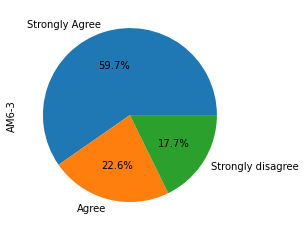

In [257]:
coded_df['AM6-3'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [294]:
n = coded_df['AM6-3'].notnull().sum()
i1_1a = coded_df['AM6-3'].isin(['Strongly Agree', 'Agree']).sum()/coded_df['AM6-3'].notnull().sum()
print(f'n: {n}, {i1_1a: .2%}')

n: 62,  82.26%


## Indicator 1.1b

In [282]:
coded_df[['PR5-5', 'PR6-5', 'PR7-4', 'PR8-5']]

,PR5-5,PR5-5,PR6-5,PR7-4,PR8-5
0,Important,NaN,Very important,Very important,Very important
1,Very important,NaN,Very important,Very important,Important
2,Important,NaN,I don’t know,Very important,Important
3,Very important,NaN,Important,Very important,Very important
4,Very important,NaN,Very important,Very important,Very important
...,...,...,...,...,...
89,Very important,NaN,Very important,Very important,Very important
90,NaN,NaN,NaN,NaN,NaN
91,NaN,Moderately important,Important,Very important,Very important
92,Important,NaN,Important,Important,Important


In [296]:
coded_df[['PR5-5', 'PR6-5', 'PR7-4', 'PR8-5']].apply(pd.Series.value_counts, axis=1)

,I don’t know,Important,Moderately important,Not important,Slightly important,Very important
0,NaN,1.0,NaN,NaN,NaN,3.0
1,NaN,1.0,NaN,NaN,NaN,3.0
2,1.0,2.0,NaN,NaN,NaN,1.0
3,NaN,1.0,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...
89,NaN,NaN,NaN,NaN,NaN,4.0
90,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,1.0,1.0,NaN,NaN,2.0
92,NaN,4.0,NaN,NaN,NaN,NaN


In [319]:
response_count = coded_df[['PR5-5', 'PR6-5', 'PR7-4', 'PR8-5']].apply(pd.Series.value_counts, axis=1)
response_count[['Important', 'Very important']].sum(axis=1)

0     4.0
1     4.0
2     3.0
3     4.0
4     4.0
     ... 
89    4.0
90    0.0
91    3.0
92    4.0
93    4.0
Length: 94, dtype: float64

In [320]:
n = (response_count[['Important', 'Very important']].sum(axis=1) > 0).sum()
agreement = (response_count[['Important', 'Very important']].sum(axis=1) == 4).sum()

In [322]:
i1_1b = agreement / n

In [323]:
print(f'n: {n}, {i1_1a: .2%}')

n: 56,  82.26%


## Indicator 1.1c
Commitment to resourcing AM in biodiveristy programming					
This sub-indicator is calculated as the percentage of respondents that agrees or strongly agrees that environment teams have access to the resources needed to adaptively manage their programs converted to a 5-point scale.					


In [324]:
coded_df[['AM4-2', 'AM12-2']]

,AM4-2,AM12-2
0,Agree,NaN
1,Agree,NaN
2,Agree,NaN
3,Agree,NaN
4,Agree,NaN
...,...,...
89,Agree,NaN
90,NaN,NaN
91,NaN,Disagree
92,Agree,NaN


In [327]:
coded_df[['AM4-2', 'AM12-2']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

0        Agree
1        Agree
2        Agree
3        Agree
4        Agree
        ...   
89       Agree
90            
91    Disagree
92       Agree
93       Agree
Length: 94, dtype: object

<AxesSubplot:ylabel='None'>

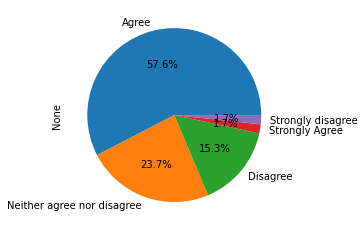

In [331]:
agreement11c = coded_df[['AM4-2', 'AM12-2']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
agreement11c = agreement11c.replace(r'^\s*$', np.nan, regex=True)
agreement11c.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [338]:
n = agreement11c.notnull().sum()
agreement = agreement11c.isin(['Strongly Agree', 'Agree']).sum()
i1_1c = agreement/n

In [339]:
print(f'n: {n}, {i1_1c: .2%}')

n: 59,  59.32%
